In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv files
df=pd.read_csv('heartdisease.csv',names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


# Data Exploration (exploratory data analysis or EDA)


In [3]:
#Display The head ==> To Check if Data is Properly Imported
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [4]:
#To check the shape of the dataset
df.shape # (rows, columns)

(200, 14)

In [5]:
#features in data
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
#checking datatypes
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [7]:
# As we can see there are lot of "?" present inplace where no data is given thus 
# we have to replace it by NaN values for further evaluation.... 
df.replace("?",np.NaN,inplace=True)
# checking the fist 10 rows of the dataset.....
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0
6,65,1,4,150,236,1,1,105,1,0,NaN,NaN,NaN,3
7,60,1,3,180,0,0,1,140,1,1.5,2,NaN,NaN,0
8,60,1,3,120,0,NaN,0,141,1,2,1,NaN,NaN,3
9,60,1,2,160,267,1,1,157,0,0.5,2,NaN,NaN,1


In [8]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age         200 non-null int64
sex         200 non-null int64
cp          200 non-null int64
trestbps    144 non-null object
chol        193 non-null object
fbs         193 non-null object
restecg     200 non-null int64
thalach     147 non-null object
exang       147 non-null object
oldpeak     144 non-null object
slope       98 non-null object
ca          2 non-null object
thal        34 non-null object
num         200 non-null int64
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [9]:
# Are there any missing values?
df.isna().sum()


age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

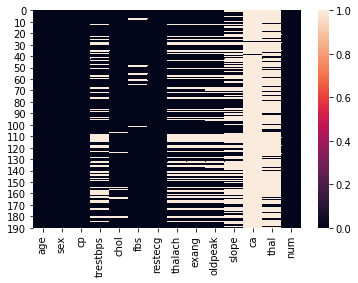

In [10]:
#heatmap for null values
sns.heatmap(df.isnull())

In [11]:
# we are being told in data description that:
#      num: diagnosis of heart disease (angiographic disease status)
#           -- Value 0: < 50% diameter narrowing
#           -- Value 1: > 50% diameter narrowing
# Thus converting the existing values of the target(0,1,2,3,4  >> 0 being no disease) into 0 and 1.
df['num'] = df.num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})


In [12]:
# Not much information is gained from this "ca" feature as out of 200 only 2 values are present so we can drop it.
df.drop("ca",axis=1,inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,1
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,1
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,6,1
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,0


In [13]:
#Lets describe the dataset
df.describe()

,age,sex,cp,restecg,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,0.745000
std,7.811697,0.171015,0.795701,0.683455,0.436955
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,2.000000,1.000000


In [14]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of age : 39
number of unique valuse of sex : 2
number of unique valuse of cp : 4
number of unique valuse of trestbps : 40
number of unique valuse of chol : 99
number of unique valuse of fbs : 2
number of unique valuse of restecg : 3
number of unique valuse of thalach : 59
number of unique valuse of exang : 2
number of unique valuse of oldpeak : 14
number of unique valuse of slope : 3
number of unique valuse of thal : 3
number of unique valuse of num : 2


In [15]:
#lets check the correlation matrix
df.corr()

,age,sex,cp,restecg,num
age,1.000000,0.034230,-0.038280,0.002400,0.189692
sex,0.034230,1.000000,0.038036,0.060621,0.098854
cp,-0.038280,0.038036,1.000000,0.034790,0.256614
restecg,0.002400,0.060621,0.034790,1.000000,-0.059146
num,0.189692,0.098854,0.256614,-0.059146,1.000000


# Univariate  Analysis

In [16]:
# Let's find out how many of each class there
df['num'].value_counts()

1    149
0     51
Name: num, dtype: int64

In [17]:
#num percentage in dataset
print('Percentage',df.num.value_counts(normalize=True))

Percentage 1    0.745
0    0.255
Name: num, dtype: float64


Text(0.5, 6.79999999999999, '0 = absence of heart disease,1 = heart disease present')

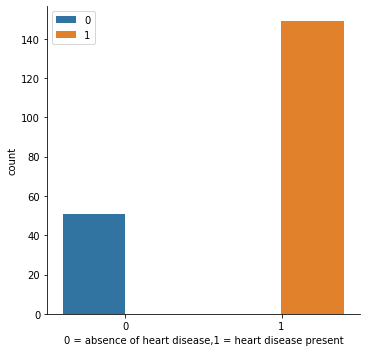

In [18]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='num',data=df,kind='count',hue='num')
plt.legend()
plt.xlabel("0 = absence of heart disease,1 = heart disease present")
#here we we see data is imbalanced but all the classes have significant number of instances

age           AxesSubplot(0.125,0.657941;0.227941x0.222059)
sex        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
cp         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
restecg       AxesSubplot(0.125,0.391471;0.227941x0.222059)
num        AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

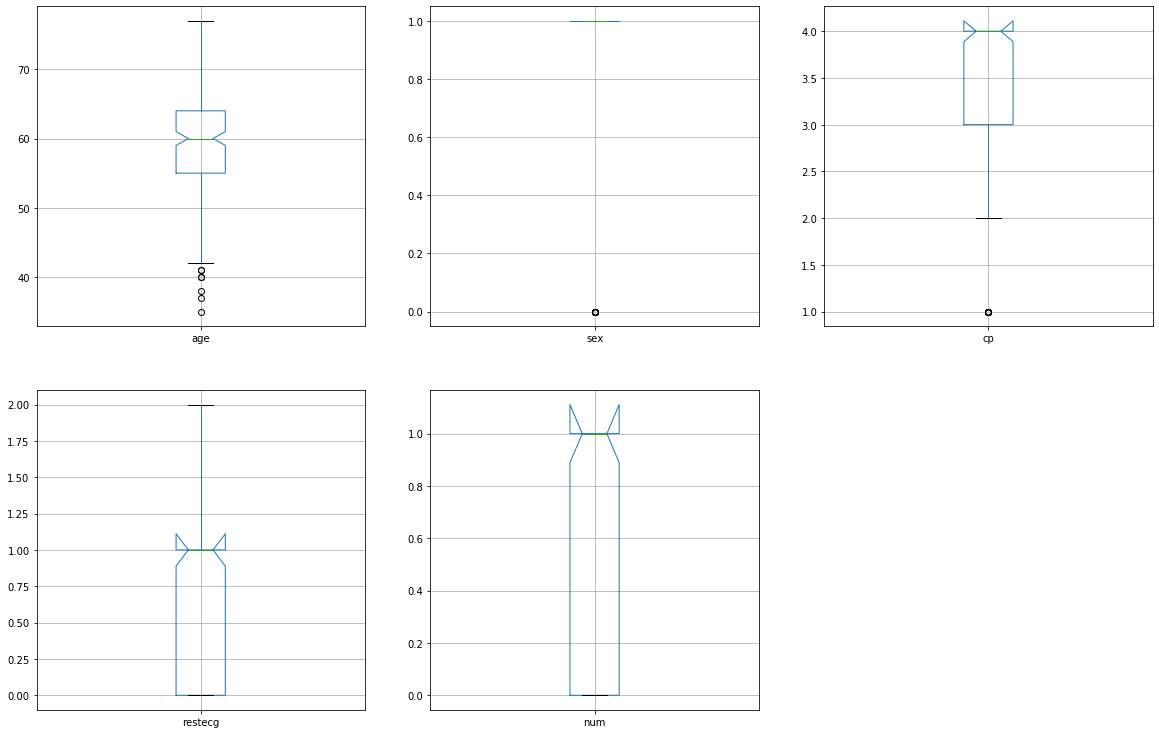

In [19]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(3,3),figsize=(20,20),grid=True,notch=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C00A0A848>,
      dtype=object)

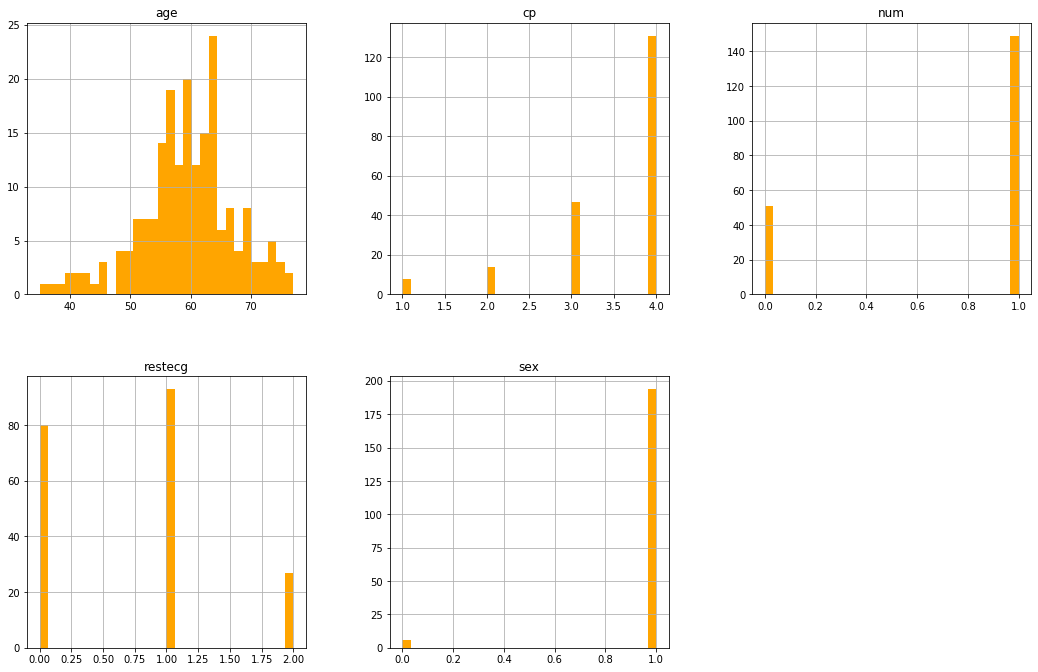

In [20]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(3,3),bins=30,color='orange')

# Bivarient  Analysis

In [21]:
#Heart Disease Frequency according to Gender
df.sex.value_counts()

1    194
0      6
Name: sex, dtype: int64

In [22]:
# Compare target column with sex column
pd.crosstab(df.num, df.sex)


sex,0,1
num,,
0,3,48
1,3,146


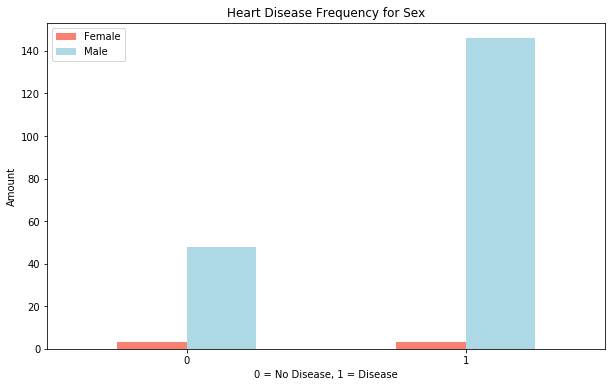

In [23]:
# Create a plot of sex who got heart disease or not 
pd.crosstab(df.num, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical
#Number of Males having heart diseases are more than the number of Females.             

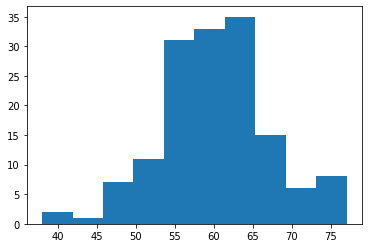

In [24]:
#we will check in which age interval heart disease are high
plt.hist(x="age",data=df.loc[df["num"]==1])
plt.show()

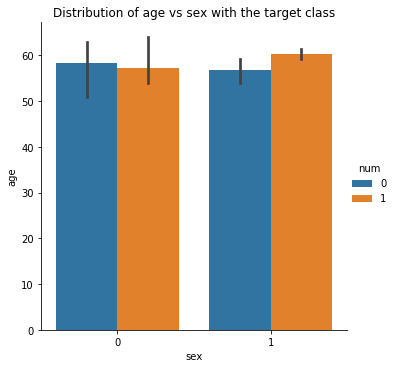

In [25]:
 #barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'num')
plt.title('Distribution of age vs sex with the target class')
plt.show()

We see that for females who are suffering from the disease are older than males.

In [26]:
#Analysing the 'Chest Pain Type' feature¶
df["cp"].unique()


array([4, 3, 2, 1], dtype=int64)

In [27]:
# Compare target column with sex column
pd.crosstab(df.num, df.cp)


cp,1,2,3,4
num,,,,
0,3,9,16,23
1,5,5,31,108


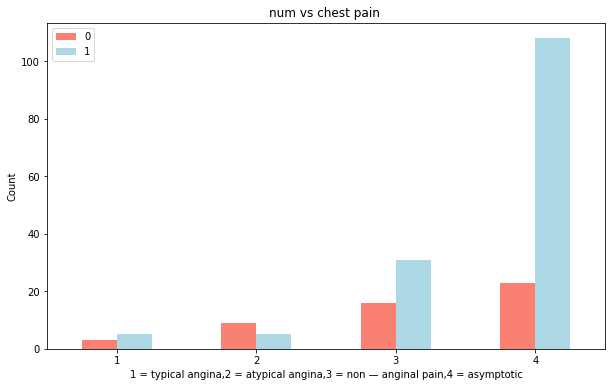

In [28]:
pd.crosstab(df.cp, df.num).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("num vs chest pain ")
plt.xlabel("1 = typical angina,2 = atypical angina,3 = non — anginal pain,4 = asymptotic")
plt.ylabel("Count")
plt.legend(["0", "1"]);
plt.xticks(rotation=0);

We notice, that chest pain of '1', i.e. the ones with typical angina are much less likely to have heart problems


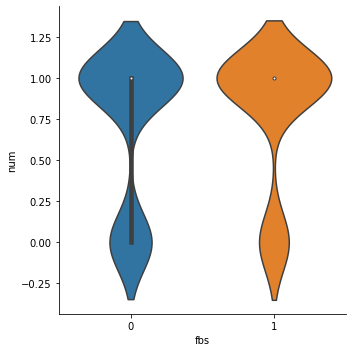

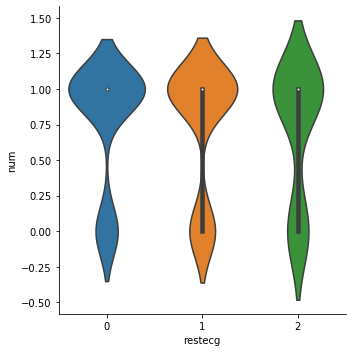

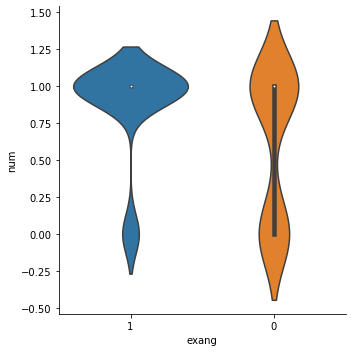

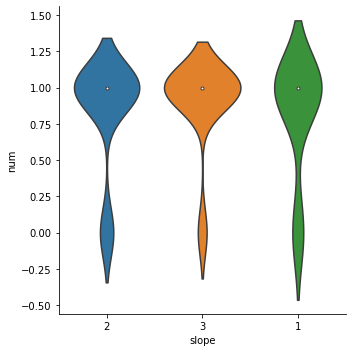

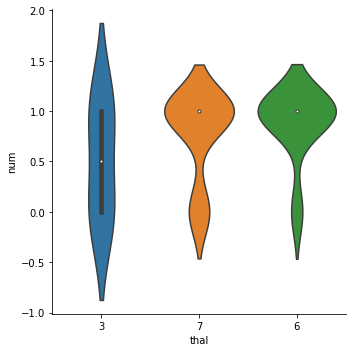

In [29]:
''' Plotting Graph between target vs fbs,restecg,exang,slope and thal
==>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect                              
==>ca: number of major vessels (0-3) colored by flourosopy                 
==>slope: the slope of the peak exercise ST segment Value 1: upsloping , Value 2: flat,Value 3: downsloping                           
==> exang: exercise induced angina (1 = yes; 0 = no)               
==>restecg: resting electrocardiographic results                   
             -- Value 0: normal                                 
             -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)   
             -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria           
==>fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)                         
                      
'''
m=df.drop(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach',
        'oldpeak', 'num'],axis=1).columns.values
for i in m:
    sns.catplot(x=i, y="num", data=df,kind="violin");
    plt.tight_layout()

In [30]:
#checking skewness values
df.skew()
#From below output it is clear that skewness exist

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.286233
chol       -0.561937
fbs         0.623105
restecg     0.391463
thalach     0.127674
exang      -0.618119
oldpeak     0.360343
slope      -0.157181
thal       -2.023545
num        -1.132724
dtype: float64

In [31]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='mean')
df['trestbps']=imp.fit_transform(df['trestbps'].values.reshape(-1,1))
df['chol']=imp.fit_transform(df['chol'].values.reshape(-1,1))
df['thalach']=imp.fit_transform(df['thalach'].values.reshape(-1,1))
df['oldpeak']=imp.fit_transform(df['oldpeak'].values.reshape(-1,1))
imp1=Imputer(missing_values='NaN',strategy='most_frequent')
df['fbs']=imp1.fit_transform(df['fbs'].values.reshape(-1,1))
df['exang']=imp1.fit_transform(df['exang'].values.reshape(-1,1))
df['slope']=imp1.fit_transform(df['slope'].values.reshape(-1,1))
df['thal']=imp1.fit_transform(df['thal'].values.reshape(-1,1))


In [32]:
#lets remove the skewness
for i in df.drop(['num'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.5:
        df[i]=np.square(df[i])

In [33]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)#shape of dataset before outliers remove
df_hd=df.loc[(z<3).all(axis=1)]
print(df_hd.shape)#shape of dataset after outliers removed

(200, 13)
(182, 13)


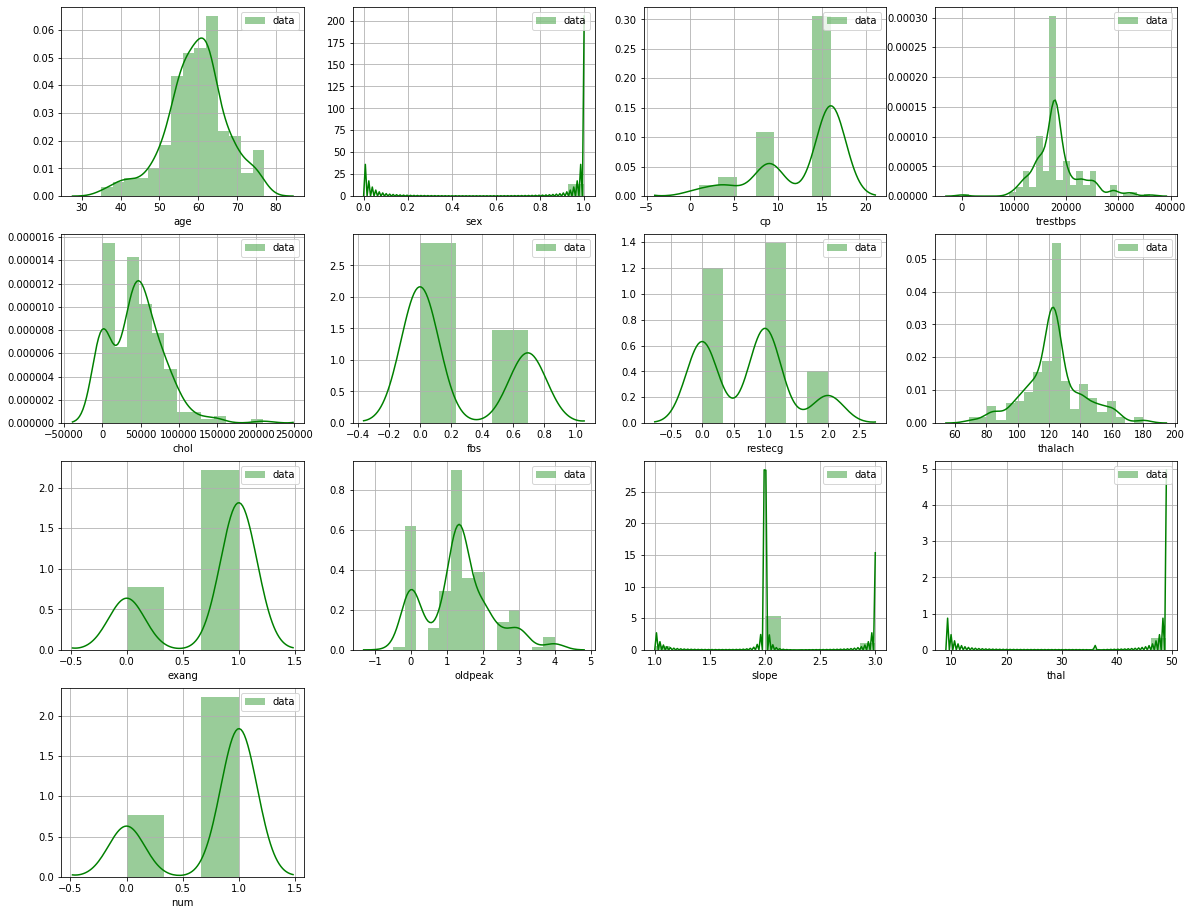

In [34]:
# Checking the Normal Distribution using distplot after removing outliers
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_hd.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

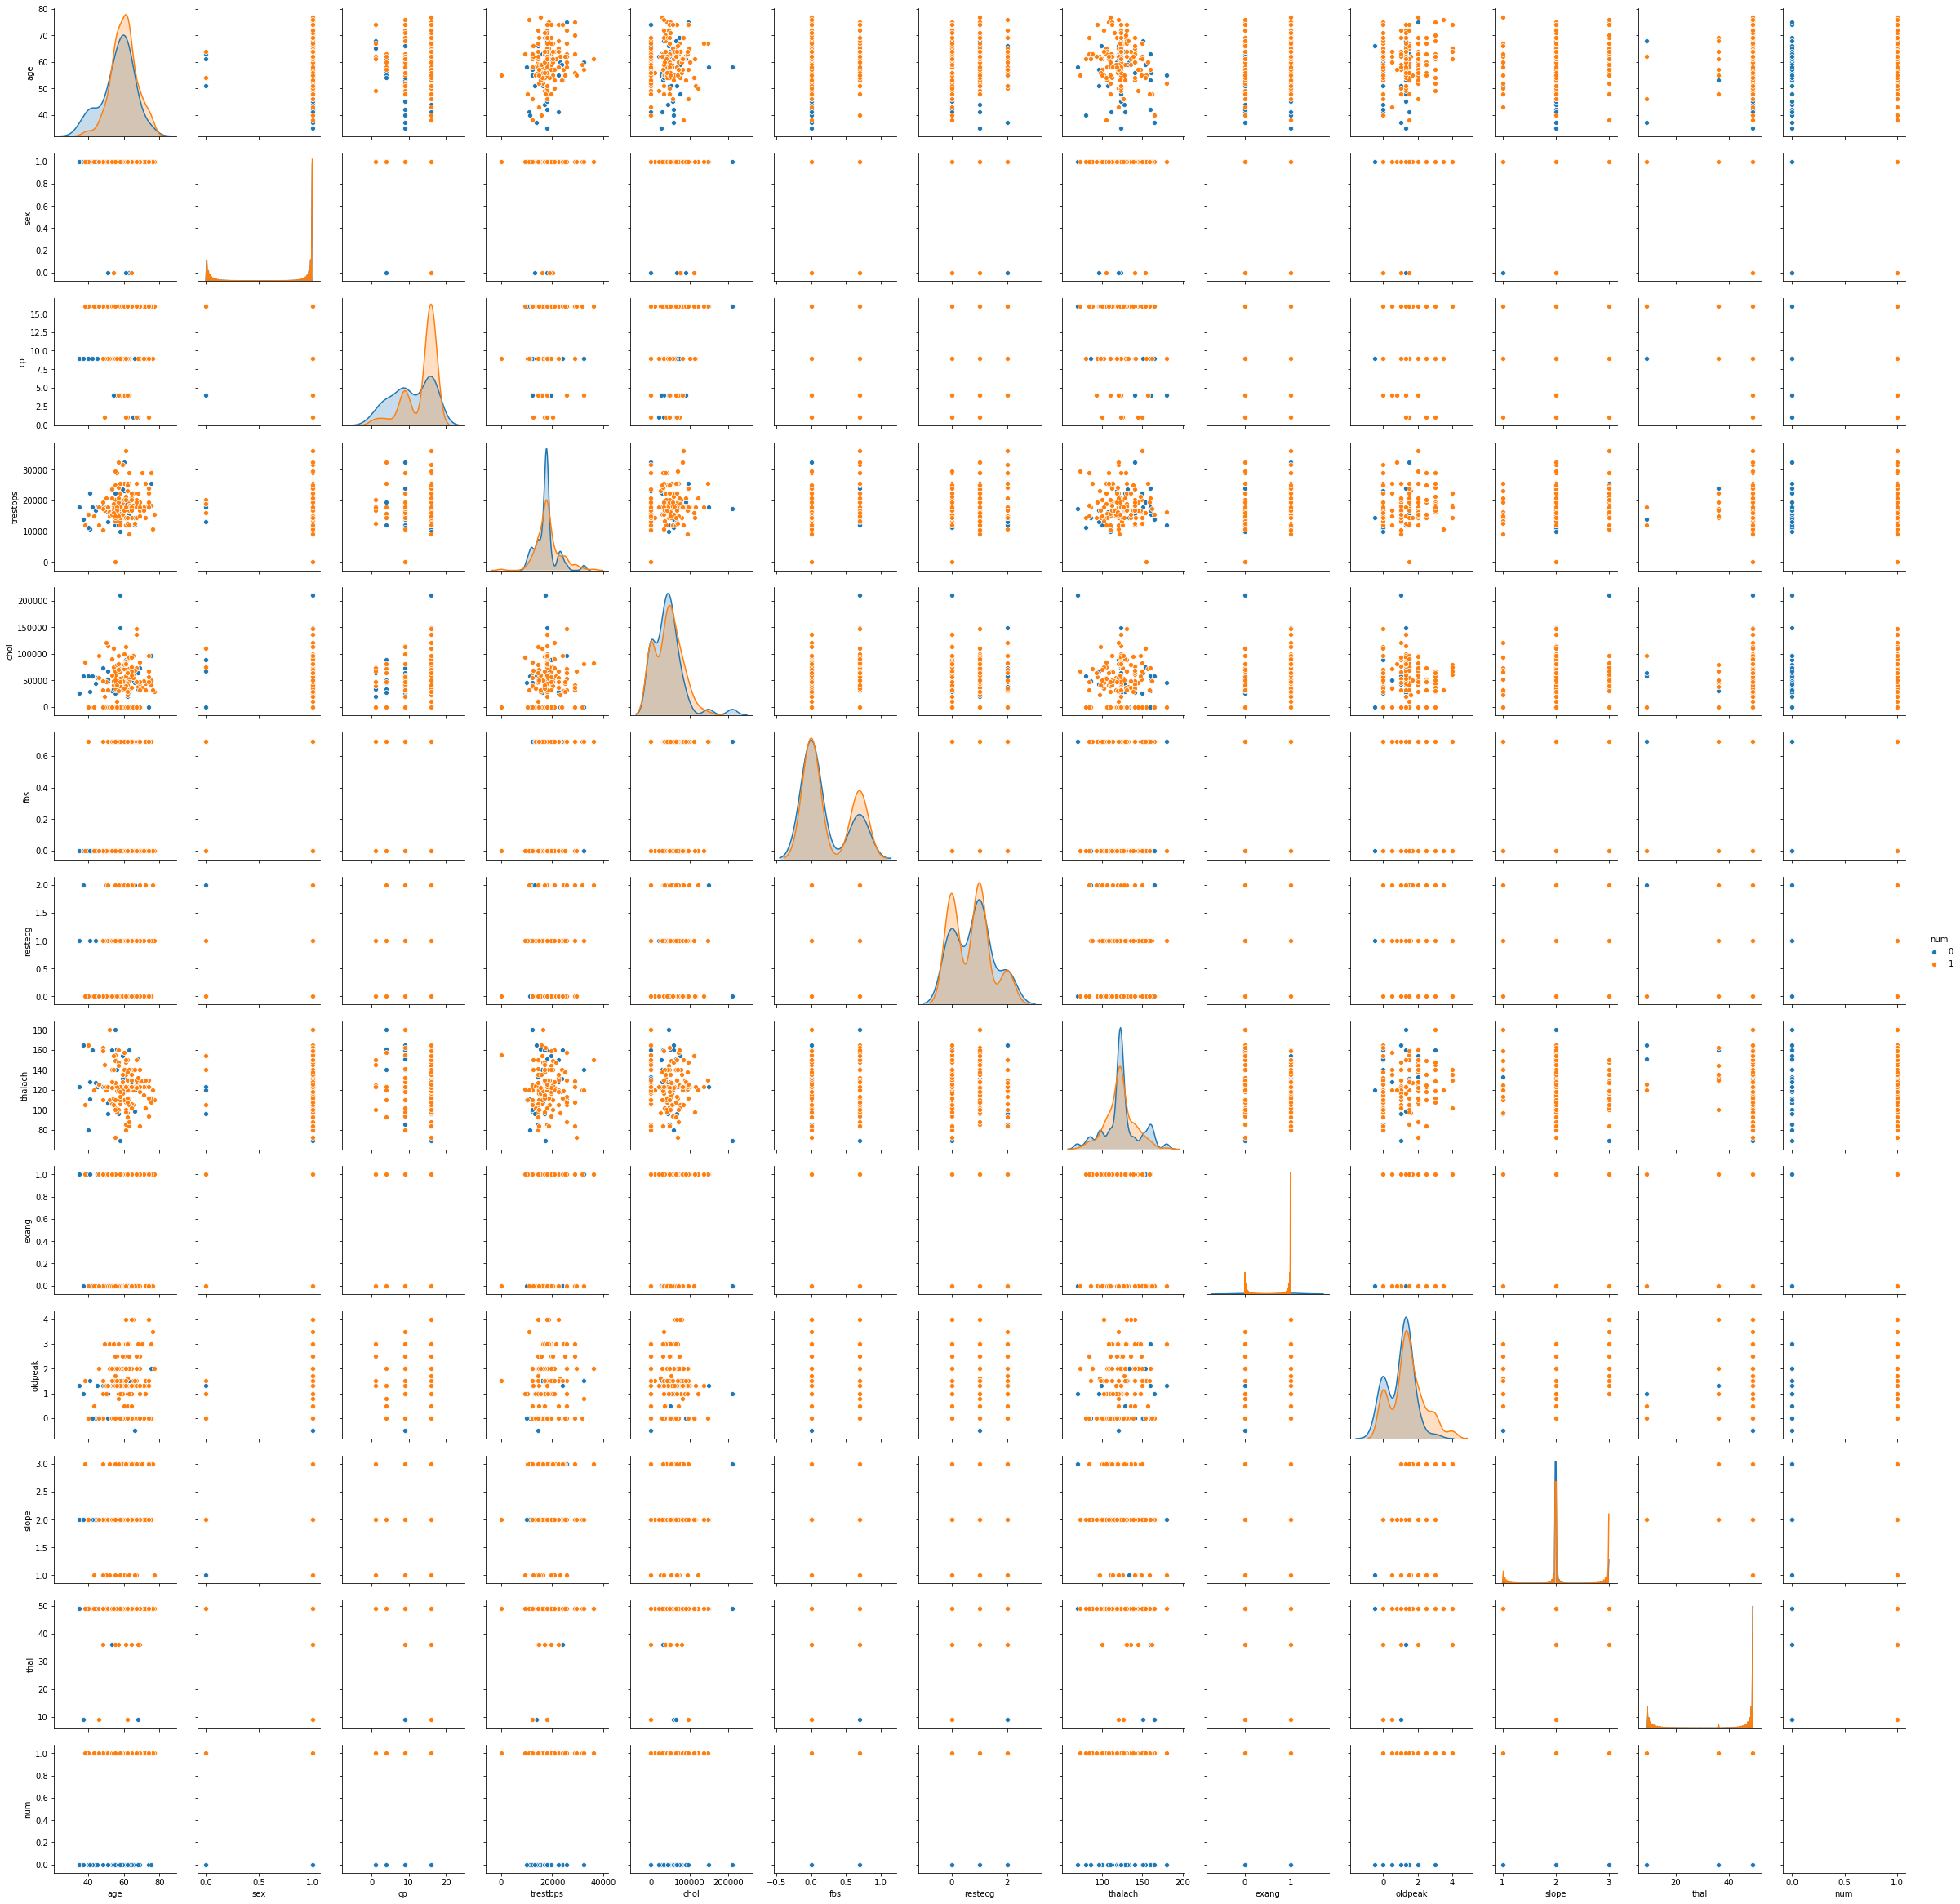

In [35]:
# Plotting Pairplot.....
sns.pairplot(df,hue='num')

(13.0, 0.0)

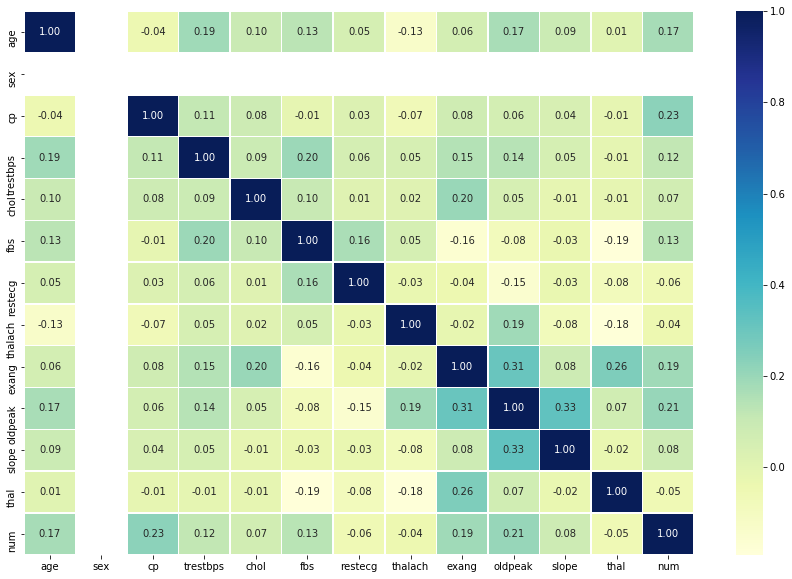

In [36]:
# Plotting Heatmap for Correlation
corr_matrix = df_hd.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

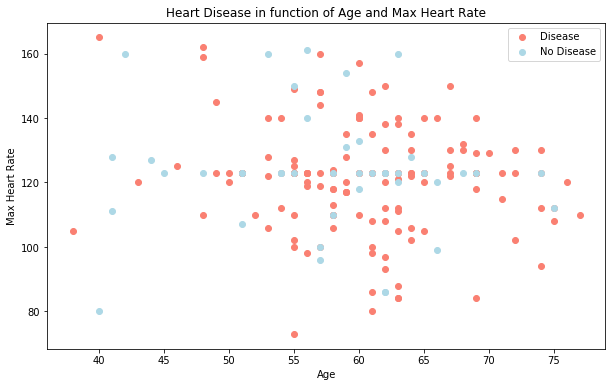

In [37]:
#Age vs Max Heart rate for Heart Disease
#Let's combining a couple of independent variables, such as, age and thalach (maximum heart rate) and then comparing them to our target variable heart disease
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df_hd.age[df_hd.num==1], 
            df_hd.thalach[df_hd.num==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df_hd.age[df_hd.num==0], 
            df_hd.thalach[df_hd.num==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");


# Modeling


In [38]:
# Split data into X and y
X = df_hd.drop("num", axis=1)

y = df_hd["num"]

In [39]:
# Independent variables (no target column)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,63,1,16,19600.0,67600.0,0.000000,1,112.0,1.0,3.0,2.0,49.0
1,44,1,16,16900.0,43681.0,0.000000,1,127.0,0.0,0.0,2.0,49.0
2,60,1,16,17424.0,47524.0,0.000000,1,140.0,1.0,1.5,3.0,49.0
3,55,1,16,20164.0,51984.0,0.000000,1,149.0,1.0,2.5,1.0,49.0
4,66,1,9,12100.0,45369.0,0.693147,2,99.0,1.0,1.3,2.0,49.0


In [40]:
# Target variable
y


0      1
1      0
2      1
3      1
4      0
      ..
193    1
196    0
197    1
198    0
199    1
Name: num, Length: 182, dtype: int64

In [41]:
#checking shape of input variable
X.shape

(182, 12)

In [42]:
#checking shape of target variable
y.shape

(182,)

In [43]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,0.426219,0.0,0.640217,0.348510,0.761044,-0.701287,0.382721,-0.561264,0.556195,1.744446,-0.152226,0.214423
1,-2.076100,0.0,0.640217,-0.323688,0.024357,-0.701287,0.382721,0.310030,-1.797932,-1.424153,-0.152226,0.214423
2,0.031116,0.0,0.640217,-0.193232,0.142719,-0.701287,0.382721,1.065152,0.556195,0.160147,1.978944,0.214423
3,-0.627389,0.0,0.640217,0.488925,0.280083,-0.701287,0.382721,1.587929,0.556195,1.216346,-2.283397,0.214423
4,0.821322,0.0,-0.907481,-1.518706,0.076346,1.425950,1.864749,-1.316386,0.556195,-0.051093,-0.152226,0.214423
...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.294518,0.0,0.640217,1.683943,-0.430886,-0.701287,0.382721,0.948980,0.556195,-1.424153,-0.152226,0.214423
178,0.294518,0.0,-2.676279,-0.076524,-0.725912,-0.701287,0.382721,0.065831,0.556195,-0.029089,-0.152226,0.214423
179,-0.627389,0.0,0.640217,-0.825596,0.210631,1.425950,0.382721,-1.258300,-1.797932,-1.424153,-0.152226,-4.663690
180,-0.232286,0.0,0.640217,-0.076524,3.244232,1.425950,1.864749,0.065831,0.556195,-0.029089,-0.152226,0.214423


In [44]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def maxrandomcore(model,x,y):
    max_acc_score=0
    for acc_state in range(42,100): 
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.22,stratify=y)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        accuracy_score1=accuracy_score(y_test,y_pred)
        if accuracy_score1 > max_acc_score:
            max_acc_score=accuracy_score1
            final_acc_state=acc_state
    print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)
    return final_acc_state

In [45]:
# Evaluate the model on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.naive_bayes import MultinomialNB
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "XGBClassifier":XGBClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        acc_state=maxrandomcore(model,x,y)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [46]:
#learning scores of a model
model_scores = fit_and_score(models=models)

model_scores


max acc score corresponding to 52 is: 0.8292682926829268
max acc score corresponding to 64 is: 0.9024390243902439
max acc score corresponding to 63 is: 0.8536585365853658
max acc score corresponding to 63 is: 0.8780487804878049
max acc score corresponding to 64 is: 0.8536585365853658
max acc score corresponding to 99 is: 0.8536585365853658
max acc score corresponding to 49 is: 0.8292682926829268
max acc score corresponding to 56 is: 0.8536585365853658
max acc score corresponding to 58 is: 0.8536585365853658


{'Logistic Regression': 0.8014184397163121,
 'KNN': 0.8368794326241135,
 'Random Forest': 0.9787234042553191,
 'GaussianNB': 0.8085106382978723,
 'SVC': 0.8368794326241135,
 'DecisionTreeClassifier': 1.0,
 'GradientBoostingClassifier': 0.9858156028368794,
 'XGBClassifier': 1.0,
 'AdaBoostClassifier': 0.9078014184397163}

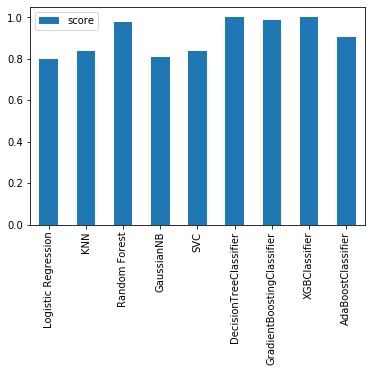

In [47]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

******************** SVC *********************


max acc score corresponding to 64 is: 0.8536585365853658
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Accuracy Score= 0.8536585365853658


Cross_val_score= 0.7857357357357356


roc_auc_score =  0.6666666666666667


Classification report
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.84      1.00      0.91        32

    accuracy                           0.85        41
   macro avg       0.92      0.67      0.71        41
weighted avg       0.88      0.85      0.82        41



[[ 3  6]
 [ 0 32]]





******************** Random Forest *********************


max acc score corresponding to 49 is: 0.8780487804878049
RandomForestClassifier(bootstrap=True, class_

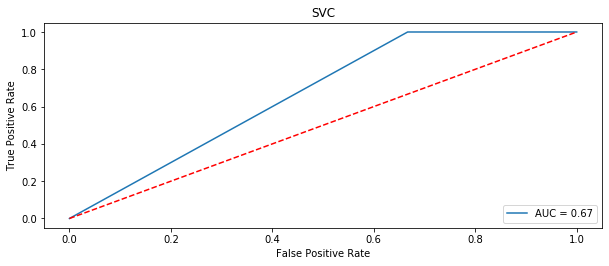

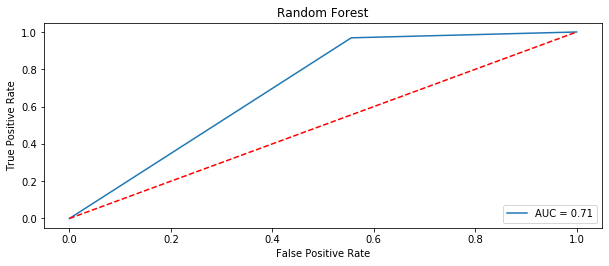

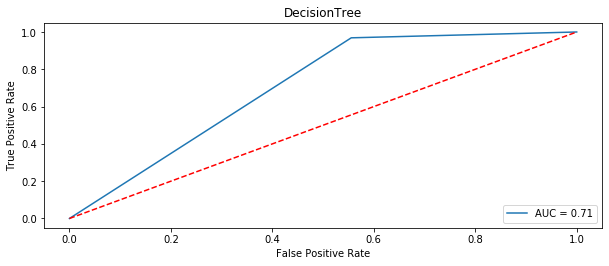

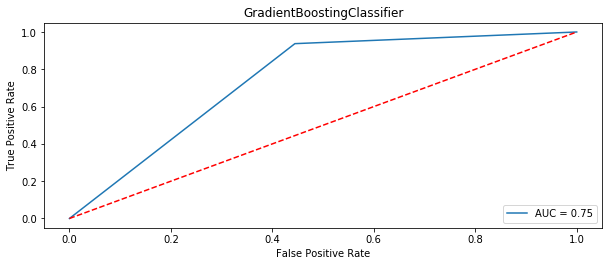

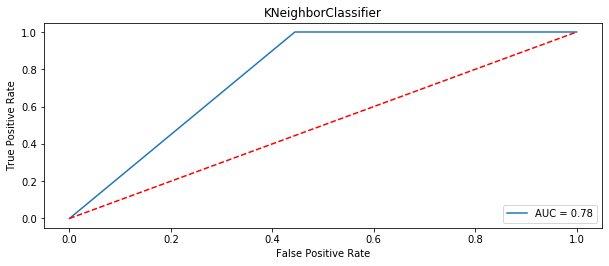

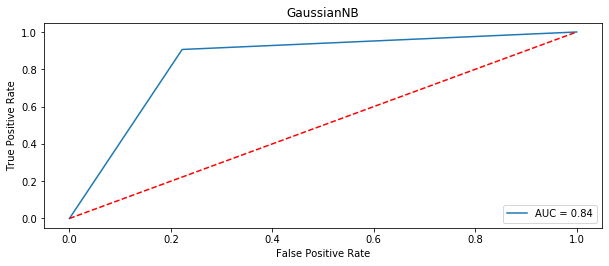

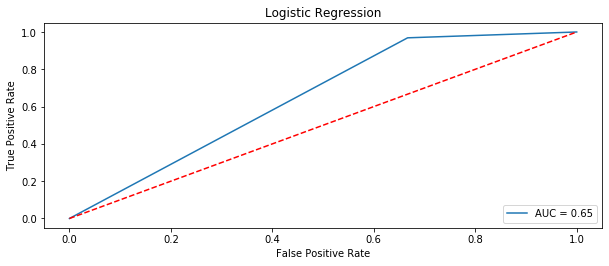

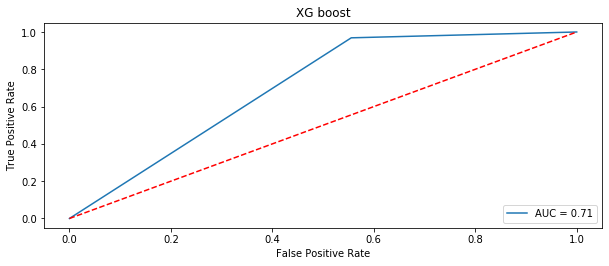

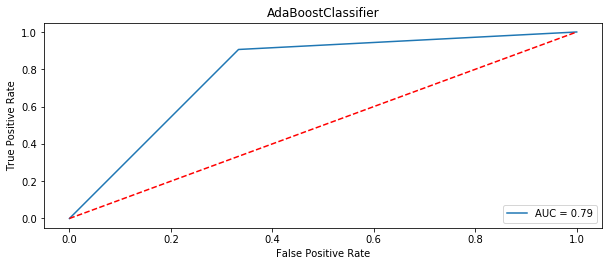

In [48]:
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
models.append(("SVC",SVC()))
models.append(("Random Forest",RandomForestClassifier(n_estimators=100)))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("KNeighborClassifier",KNeighborsClassifier(n_neighbors=6)))
models.append(("GaussianNB",GaussianNB()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("XG boost",XGBClassifier()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))

Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("********************",name,"*********************")
    print('\n')
    Model.append(name)
    acc_state=maxrandomcore(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.22,stratify=y)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label= 'AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n\n")



In [49]:
#lookover the accuracy_score,Cross_val_score,Roc_auc_curve in a DataFrame which we calculated above
result=pd.DataFrame({'Model':Model,'accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,accuracy_score,Cross_val_score,Roc_auc_curve
0,SVC,85.365854,78.573574,66.666667
1,Random Forest,85.365854,78.003003,70.659722
2,DecisionTree,85.365854,74.699700,70.659722
3,GradientBoostingClassifier,85.365854,70.885886,74.652778
4,KNeighborClassifier,90.243902,78.048048,77.777778
5,GaussianNB,87.804878,65.315315,84.201389
6,Logistic Regression,82.926829,79.669670,65.104167
7,XG boost,85.365854,76.381381,70.659722
8,AdaBoostClassifier,85.365854,73.033033,78.645833


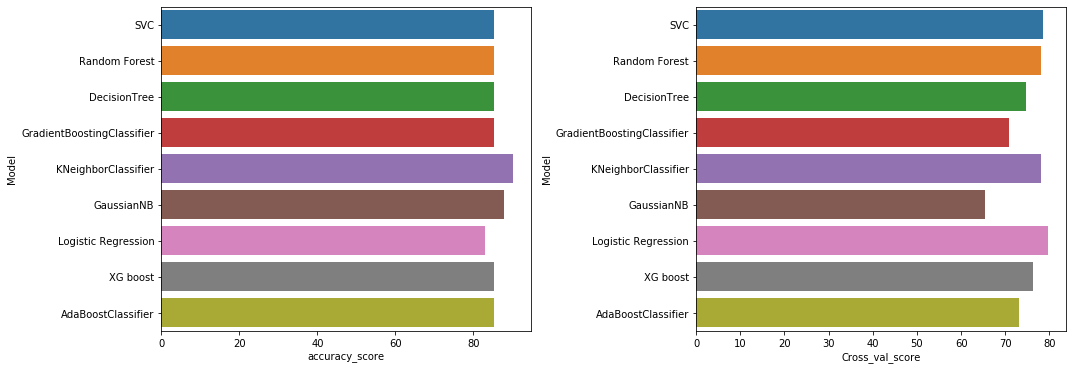

In [50]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'accuracy_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [51]:
#function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [52]:
#for getting best set of parameters for LogisticRegression we will use grid searchCV
from sklearn.model_selection import GridSearchCV
gridR = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}


clfR = LogisticRegression()

# Setup GridSearchCV
gs_clfR = GridSearchCV(estimator=clfR,
                      param_grid=gridR,
                      cv=5, # 3-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV
gs_clfR.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, solver=liblinear ......................
[CV] ....... C=0.00026366508987303583, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, solver=liblinear ......................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........... C=29.763514416313132, solver=liblinear, total=   0.0s
[CV] C=78.47599703514607, solver=liblinear ...........................
[CV] ............ C=78.47599703514607, solver=liblinear, total=   0.0s
[CV] C=78.47599703514607, solver=liblinear ...........................
[CV] ............ C=78.47599703514607, solver=liblinear, total=   0.0s
[CV] C=78.47599703514607, solver=liblinear ...........................
[CV] ............ C=78.47599703514607, solver=liblinear, total=   0.0s
[CV] C=78.47599703514607, solver=liblinear ...........................
[CV] ............ C=78.47599703514607, solver=liblinear, total=   0.0s
[CV] C=78.47599703514607, solver=liblinear ...........................
[CV] ............ C=78.47599703514607, solver=liblinear, total=   0.0s
[CV] C=206.913808111479, solver=liblinear ............................
[CV] ............. C=206.913808111479, solver=liblinear, total=   0.0s
[CV] C=206.913808111479, solver=liblinear ............................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [53]:
# best parameters for LogisticRegression
print("Best parameter:",gs_clfR.best_params_)
print("score:",gs_clfR.best_score_)

Best parameter: {'C': 0.23357214690901212, 'solver': 'liblinear'}
score: 0.7872340425531915


In [54]:
#checking accuracy score using best parameters which calculated from gridsearchCV
clfR = LogisticRegression(C= 0.23357214690901212, solver='liblinear')
maxrandomcore(clfR,x,y)

max acc score corresponding to 68 is: 0.8536585365853658


68

In [55]:
#for getting best set of parameters for DecisionTreeClassifier we will use grid searchCV
gridD = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'criterion':['gini','entropy']}

clfD = DecisionTreeClassifier()

# Setup GridSearchCV
gs_clfD = GridSearchCV(estimator=clfD,
                      param_grid=gridD,
                      cv=5, # 3-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV
gs_clfD.fit(x_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 588 candidates, totalling 2940 fits
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=3 .

[CV]  criterion=gini, max_leaf_nodes=6, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=6, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=6, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=6, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=6, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=6, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=6, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=6, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=6, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=6, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=6, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=6, min_samples_split=4 ...........
[CV]  criterion=gini, max_leaf_nodes=6, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=6, min_sample

[CV] criterion=gini, max_leaf_nodes=11, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=11, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=11, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=11, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=11, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=11, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=11, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=11, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=11, min_sa

[CV]  criterion=gini, max_leaf_nodes=16, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=16, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=16, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=16, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=16, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=16, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=16, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=16, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=16, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=16, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=16, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=16, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=16, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=16, mi

[CV]  criterion=gini, max_leaf_nodes=21, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=21, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=21, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=21, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=21, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=21, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=21, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=21, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=21, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=21, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=21, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=21, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=21, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=21, mi

[CV]  criterion=gini, max_leaf_nodes=26, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=26, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=26, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=26, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=26, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=26, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=26, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=26, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=26, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=26, mi

[CV]  criterion=gini, max_leaf_nodes=31, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=31, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=31, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=31, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=31, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=31, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=31, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=31, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=31, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, mi

[CV]  criterion=gini, max_leaf_nodes=36, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=36, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=36, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=36, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=36, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=37, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=37, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=37, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=37, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=37, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=37, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=37, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=37, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=37, mi

[CV]  criterion=gini, max_leaf_nodes=42, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=42, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=42, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=42, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=42, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=42, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=42, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=42, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=42, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=42, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=42, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=42, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=42, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=42, mi

[CV]  criterion=gini, max_leaf_nodes=47, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=47, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=47, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=47, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=47, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=47, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=47, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=47, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=47, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=47, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=47, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=47, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=47, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=47, mi

[CV]  criterion=gini, max_leaf_nodes=52, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=52, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=52, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=52, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=52, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=52, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=52, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=52, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=52, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=52, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=52, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=53, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=53, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=53, mi

[CV]  criterion=gini, max_leaf_nodes=57, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=57, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=57, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=57, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=57, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=58, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=58, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=58, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=58, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=58, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=58, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=58, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=58, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=58, mi

[CV]  criterion=gini, max_leaf_nodes=62, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=63, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=63, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=63, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=63, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=63, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=63, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=63, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=63, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=63, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=63, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=63, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=63, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=63, mi

[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, mi

[CV]  criterion=gini, max_leaf_nodes=72, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=73, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=73, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=73, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=73, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=73, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=73, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=73, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=73, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=73, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=73, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=73, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=73, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=73, mi

[CV]  criterion=gini, max_leaf_nodes=78, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=78, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=78, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=78, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=78, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=78, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=78, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=78, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=78, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=78, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=78, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=78, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=78, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=78, mi

[CV]  criterion=gini, max_leaf_nodes=83, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=83, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=83, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=83, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=83, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=83, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=83, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=83, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=83, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=83, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=83, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=83, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=83, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=83, mi

[CV]  criterion=gini, max_leaf_nodes=88, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=88, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=88, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=88, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=88, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=88, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=88, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, mi

[CV]  criterion=gini, max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=93, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=93, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=93, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=93, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=93, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=93, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=93, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=93, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=93, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=93, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=93, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=93, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=93, mi

[CV]  criterion=gini, max_leaf_nodes=98, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=98, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=98, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=98, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=98, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=98, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=98, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=98, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=98, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=98, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=98, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=98, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=98, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=98, mi

[CV]  criterion=entropy, max_leaf_nodes=5, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=5, min_samples_split=4 ........
[CV]  criterion=entropy, max_leaf_nodes=5, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=5, min_samples_split=4 ........
[CV]  criterion=entropy, max_leaf_nodes=5, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=6, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=6, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=6, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=6, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=6, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=6, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=6, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=6, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_

[CV]  criterion=entropy, max_leaf_nodes=11, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=11, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=11, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=11, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=11, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=11, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=11, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=11, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=11, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=11, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=15, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=16, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=16, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=16, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=16, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=16, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=16, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=16, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=16, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=16, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=16, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=16, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=16, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=20, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=21, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=21, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=21, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=21, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=21, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=21, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=21, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=21, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=21, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=21, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=21, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=21, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=31, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=31, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=36, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=36, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=36, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=36, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=36, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=36, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=36, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=36, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=36, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=36, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=36, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=36, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=36, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=41, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=41, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=41, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=41, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=41, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=41, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=41, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=41, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=41, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=41, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=41, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=41, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=41, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=46, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=46, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=46, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=46, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=46, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=46, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=46, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=46, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=46, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=47, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=47, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=47, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=47, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=51, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=51, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=51, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=51, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=51, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=51, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=51, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=52, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=52, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=52, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=52, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=52, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=52, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=56, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=56, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=56, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=57, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=57, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=57, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=57, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=57, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=57, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=57, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=57, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=57, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=57, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=62, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=62, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=62, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=62, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=62, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=62, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=62, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=62, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=62, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=62, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=62, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=62, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=62, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=67, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=67, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=67, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=67, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=67, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=67, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=67, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=67, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=67, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=67, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=67, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=67, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=67, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=72, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=72, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=72, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=72, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=72, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=72, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=72, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=72, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=72, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=72, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=72, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=72, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=72, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=77, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=77, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=77, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=77, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=77, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=77, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=77, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=77, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=77, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=77, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=77, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=77, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=77, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=82, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=82, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=82, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=82, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=82, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=82, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=82, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=82, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=82, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=82, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=82, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=83, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=83, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=87, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=87, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=87, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=87, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=87, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=88, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=88, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=88, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=88, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=88, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=88, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=88, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=88, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=92, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=93, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=93, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=93, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=93, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=93, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=93, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=93, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=98, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=98, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=98, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=98, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=98, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=98, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=98, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=98, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=98, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=98, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=98, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=98, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=98, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[Parallel(n_jobs=1)]: Done 2940 out of 2940 | elapsed:    7.1s finished


In [56]:
# best parameters for DecisionTreeClassifier
print("Best parameter:",gs_clfD.best_params_)
print("score:",gs_clfD.best_score_)

Best parameter: {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 2}
score: 0.7375886524822695


In [57]:
#checking accuracy score using best parameters which calculated from gridsearchCV
dtc=DecisionTreeClassifier(criterion = 'gini',max_leaf_nodes=5, min_samples_split= 3)
maxrandomcore(dtc,x,y)

max acc score corresponding to 73 is: 0.8292682926829268


73

In [58]:
#use gridsearchcv to find out best parameters for KNeighborsClassifier
grid_1={'n_neighbors':[3,5,11,19],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
            }
# Setup GridSearchCV
gs_clf1 = GridSearchCV(KNeighborsClassifier(),
                      param_grid=grid_1,
                      cv=5, # 5-fold cross-validation
                      verbose=2,
                      n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf1.fit(x_train, y_train);


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  57 out of  80 | elapsed:    2.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.9s finished


In [59]:
# best parameters for KNeighborsClassifier
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
score: 0.8226950354609929


In [60]:
#checking accuracy score using best parameters which calculated from gridsearchCV
knn=KNeighborsClassifier(metric='euclidean', n_neighbors= 5, weights= 'uniform')
maxrandomcore(knn,x,y)

max acc score corresponding to 64 is: 0.9024390243902439


64

In [61]:
#lets use gridsearchcv to find out best parameters for RandomForestClassifier
grid = {'n_estimators': [500, 1000, 1500],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=None, max_feature

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   0.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   0.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   0.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   0.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   0.8s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.5s
[CV] max_depth=None, max_f

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   0.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   0.8s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   0.9s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  3.3min finished


In [62]:
# best parameters for RandomForestClassifier
print("Best parameter:",gs_clf.best_params_)
print("score:",gs_clf.best_score_)

Best parameter: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 1500}
score: 0.7872340425531915


In [63]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestClassifier(n_estimators=1000,max_depth=None, min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=4)
maxrandomcore(rf,x,y)

max acc score corresponding to 49 is: 0.8780487804878049


49

In [64]:
#lets use gridsearchcv to find out best parameters for GradientBoostingClassifier
grid_3 = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
clf = GradientBoostingClassifier()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clf,
                      param_grid=grid_3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf3.fit(x_train, y_train);

Fitting 5 folds for each of 84672 candidates, totalling 423360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1926 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 4506 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 8886 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 14226 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 20550 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 27834 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 36102 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 45330 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 55542 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 66714 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 78870 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 91986 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 106086

In [65]:
# best parameters for GradientBoostingClassifier
print("Best parameter:",gs_clf3.best_params_)
print("score:",gs_clf3.best_score_)

Best parameter: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.31818181818181823, 'n_estimators': 10, 'subsample': 0.8}
score: 0.8014184397163121


In [66]:
#checking accuracy score using best parameters which calculated from gridsearchCV
gb=GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate= 0.2, loss='deviance', max_depth=8, max_features= 'sqrt', min_samples_leaf= 0.1,min_samples_split=0.390909090909091, n_estimators=10, subsample= 0.85)
maxrandomcore(gb,x,y)

max acc score corresponding to 45 is: 0.8048780487804879


45

In [67]:
#lets use gridsearchcv to find out best parameters for SVC
grid_4 = { 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000],'kernel':['linear','poly','rbf']
         }
clf = SVC()

# Setup GridSearchCV
gs_clf4 = GridSearchCV(estimator=clf,
                      param_grid=grid_4,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

gs_clf4.fit(x_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=poly .................................
[CV] .................. C=10, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=poly .................................
[CV] .

[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.8s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   1.9s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.6s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ................ C=1000, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ................ C=1000, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    8.8s finished


In [68]:
#best parameters for svc
print("Best parameter:",gs_clf4.best_params_)
print("score:",gs_clf4.best_score_)

Best parameter: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
score: 0.8014184397163121


In [69]:
#checking accuracy score using best parameters which calculated from gridsearchCV
svc=SVC(C=1000,gamma=0.001,kernel='rbf')
maxrandomcore(svc,x,y)

max acc score corresponding to 64 is: 0.8536585365853658


64

In [72]:
#using AdaBoostClassifier base_estimator as RandomForestRegressor
rm=RandomForestClassifier(n_estimators=1000,max_depth=None, min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=4)
ada_rm=AdaBoostClassifier(base_estimator=rm,learning_rate=0.01,n_estimators=10)
ada_rm.fit(x_train, y_train)
y_predrad = ada_rm.predict(x_test)
evaluate_preds(y_test,y_predrad)


Acc: 73.17%
Precision: 0.80
Recall: 0.88
F1 score: 0.84


{'accuracy': 0.73, 'precision': 0.8, 'recall': 0.88, 'f1': 0.84}

# After all this process conclusion is that KNeighborsClassifier is performing well.

In [73]:
#lets make our final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=64,test_size=0.22,stratify=y)
knn=KNeighborsClassifier(metric='euclidean', n_neighbors= 5, weights= 'uniform')
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
evaluate_preds(y_test,knnpred)

Acc: 90.24%
Precision: 0.89
Recall: 1.00
F1 score: 0.94


{'accuracy': 0.9, 'precision': 0.89, 'recall': 1.0, 'f1': 0.94}

(2.0, 0.0)

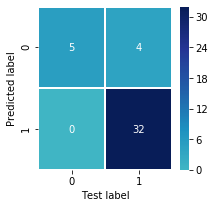

In [74]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, knnpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("Test label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

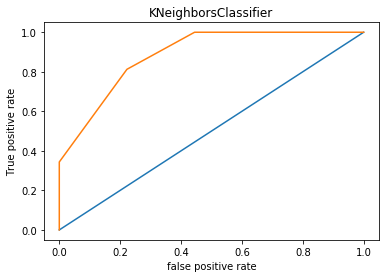

roc_auc_score =  0.8854166666666666


In [75]:
# Make predictions with probabilities
y_probs = knn.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

In [76]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=knnpred
test
# On the lest side values are those fields which are taken by machine for test...

,num,Predicted values
125,1,1
121,1,1
61,1,1
110,1,1
116,1,1
0,1,1
164,1,1
15,0,0
166,1,1
104,0,0


In [77]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(knnpred)
df1.to_csv('heart_disease_submission.csv')

In [78]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(knn,'heart_disease_submission.pkl')

['heart_disease_submission.pkl']

In [79]:
#lets read the model using joblib
knn_from_joblib=joblib.load('heart_disease_submission.pkl')
joblib_y_preds = knn_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 90.24%
Precision: 0.89
Recall: 1.00
F1 score: 0.94


{'accuracy': 0.9, 'precision': 0.89, 'recall': 1.0, 'f1': 0.94}